argv[0]=
Loaded EGL 1.5 after reload.
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics (TGL GT1)
GL_VERSION=4.6 (Compatibility Profile) Mesa 21.2.6
GL_SHADING_LANGUAGE_VERSION=4.60
Version = 4.6 (Compatibility Profile) Mesa 21.2.6
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics (TGL GT1)
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
Total Steps: 237, Total Rewards: -41.016263312496434
Total Steps: 506, Total Rewards: -127.77194591871688
Total Steps: 741, Total Rewards: -51.338924930649156
(array([237, 506, 741]),)
Destroy EGL OpenGL window.


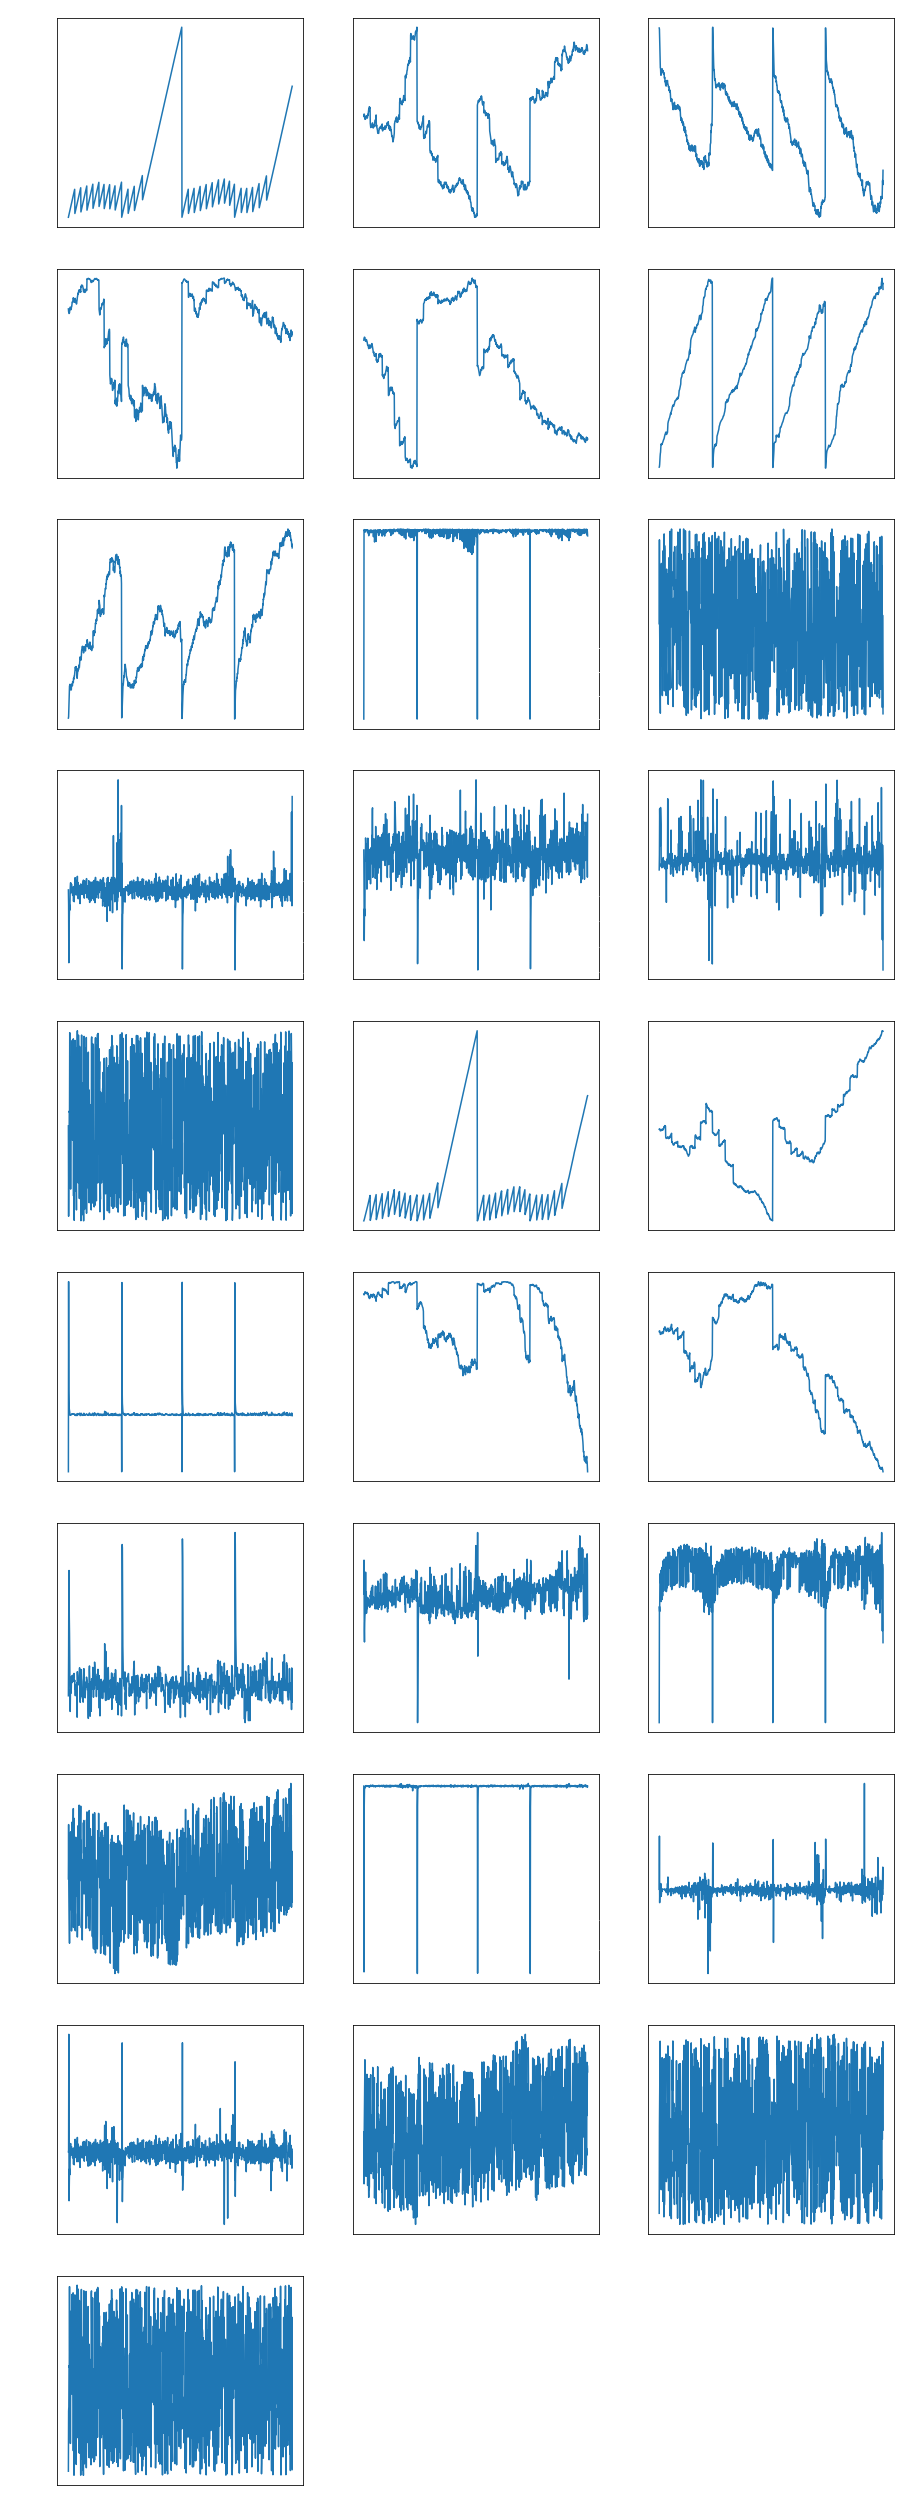

In [4]:
import gym
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch
import omegaconf
import time
import torch

import tactile_gym.rl_envs

from tactile_gym.sb3_helpers.params import import_parameters

# Make the pushing environment
algo_name = 'ppo'
env_name = 'object_push-v0'
rl_params, algo_params, augmentations = import_parameters(env_name, algo_name)
rl_params["env_modes"][ 'observation_mode'] = 'oracle_data_reduced'
rl_params["env_modes"][ 'terminate_early'] = True

env_kwargs={
    'show_gui':False,
    'show_tactile':False,
    'max_steps':rl_params["max_ep_len"],
    'image_size':rl_params["image_size"],
    'env_modes':rl_params["env_modes"],
}
env = gym.make(env_name, **env_kwargs)

seed = 0
env.seed(seed)
obs_shape = env.observation_space.shape
act_shape = env.action_space.shape


state = env.reset()
done = False 
total_rewards = 0
step = 0 
render = False
capacity = 1000

states = np.empty((capacity, *obs_shape))
actions = np.empty((capacity, *act_shape))
rewards = np.empty(capacity)
dones = np.empty(capacity)
obs = np.empty((capacity, 30))

# until done 
for step in range(0, capacity):
    
    # Add state
    states[step] = state

    # take an action 
    current_act = env.action_space.sample()
    state, reward, done, info = env.step(current_act)


    # Record info
    actions[step] = current_act
    dones[step] = done
    rewards[step] = reward
    obs[step] = env.get_oracle_obs()

    # acculmulate rewards
    total_rewards += reward

    if done:
        print("Total Steps: {}, Total Rewards: {}".format(step, total_rewards))
        # print(obs[step][0:3])
        # print(obs[step][12:15])
        # print()
        state = env.reset()
        total_rewards = 0

    if render:
        render_img = env.render(mode="rgb_array")

env.close()

index_done = np.where(dones == True)
print(index_done)

model_in = np.concatenate([states, actions], axis=states.ndim - 1)

# Plot states
for i in range(obs_shape[0]+act_shape[0]):
    plt.subplot(11, 3, i+1)
    plt.plot(model_in[:,i])
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

plt.gcf().set_size_inches(15, 50)
plt.show()

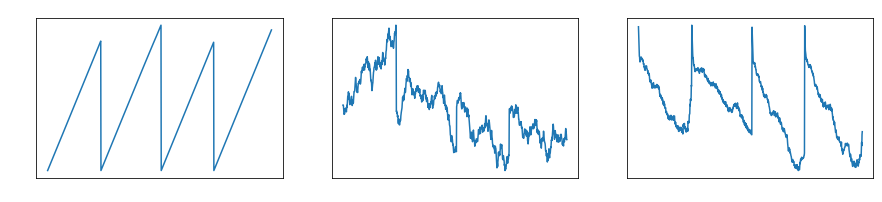

Final TCP position:  [0.256135 -0.006125 -0.000031]


In [5]:
# plot tcp postion
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.plot(obs[:,i])
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

plt.gcf().set_size_inches(15, 10)
plt.show()

print("Final TCP position: ", obs[-1, 0:3])

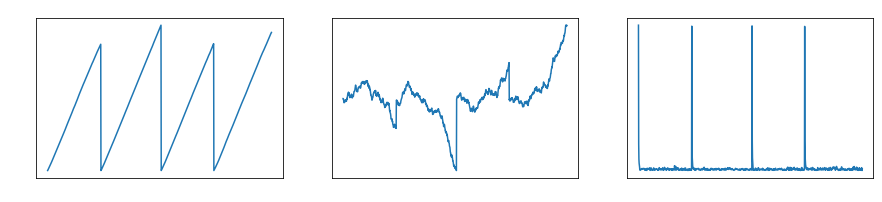

Final object pos:  [0.098505 0.003092 0.000010]


In [6]:
# plot object postion
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.plot(obs[:,i+12])
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
plt.gcf().set_size_inches(15, 10)
plt.show()

print("Final object pos: ", obs[300,12:15])